In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, shapiro
import seaborn as sns

In [62]:
# Attributes
attribute = ["Daerah","SumbuUtama","SumbuKecil","Keunikan","AreaBulatan","Diameter","KadarAir","Keliling","Bulatan","Ransum","Kelas"]
data = pd.read_csv("../data/Gandum.csv", names = attribute)
data

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
4,4141,108.701190,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766961,2.197877,1
5,5273,122.747868,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...
496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


# Soal 1

In [63]:
ans = {}

for att in attribute:
    temp = {}
    temp["Mean"] = data[att].mean()
    temp["Median"] = data[att].median()
    temp["Modus"] = np.bincount(data[att]).argmax()
    temp["Std"] = data[att].std()
    temp["Var"] = data[att].var()
    temp["Minimum"] = data[att].min()
    temp["Maximum"] = data[att].max()
    temp["Range"] = data[att].max()-data[att].min()
    quartile = data[att].quantile([.25, .5, .75])
    temp["25%"] = quartile[.25]
    temp["50%"] = quartile[.5]
    temp["75%"] = quartile[.75]
    q75, q25 = np.percentile(data[att], [75 ,25])
    temp["IQR"] = q75 - q25
    temp["Skew"] = data[att].skew()
    temp["Kurtosis"] = data[att].kurtosis()

    ans[att] = temp

ans = pd.DataFrame(ans)
ans

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
Mean,4801.246000,116.045171,53.715246,0.878764,4.937048e+03,77.771158,0.648372,281.479722,0.761737,2.150915,1.502000
Median,4735.000000,115.405140,53.731199,0.890045,4.857000e+03,77.645277,0.626117,280.045500,0.761288,2.193599,2.000000
Modus,3992.000000,106.000000,55.000000,0.000000,3.802000e+03,74.000000,0.000000,240.000000,0.000000,2.000000,2.000000
Std,986.395491,18.282626,4.071075,0.036586,1.011696e+03,8.056867,0.094367,37.335402,0.061702,0.249767,0.500497
Var,972976.065615,334.254412,16.573650,0.001339,1.023529e+06,64.913111,0.008905,1393.932221,0.003807,0.062383,0.250497
Minimum,2522.000000,74.133114,39.906517,0.719916,2.579000e+03,56.666658,0.409927,197.015000,0.174590,1.440796,1.000000
Maximum,7453.000000,227.928583,68.977700,0.914001,7.720000e+03,97.413830,0.878899,488.837000,0.904748,2.464809,2.000000
Range,4931.000000,153.795469,29.071182,0.194085,5.141000e+03,40.747172,0.468972,291.822000,0.730158,1.024013,1.000000
25%,4042.750000,104.116098,51.193576,0.863676,4.170250e+03,71.745308,0.572632,255.883000,0.731991,1.983939,1.000000
50%,4735.000000,115.405140,53.731199,0.890045,4.857000e+03,77.645277,0.626117,280.045500,0.761288,2.193599,2.000000


# Soal 2

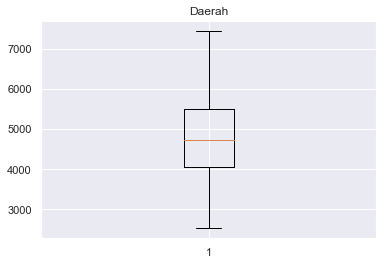

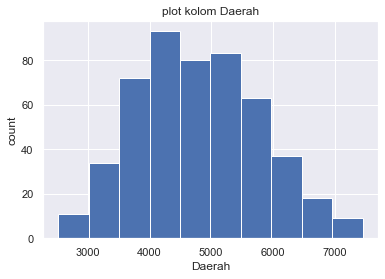

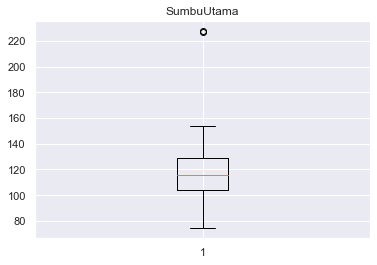

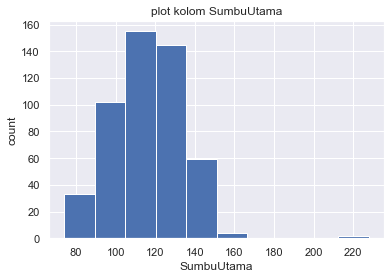

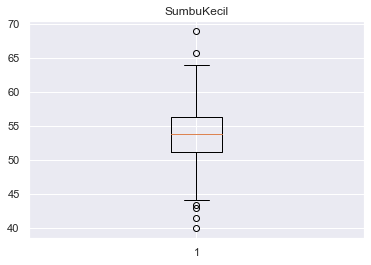

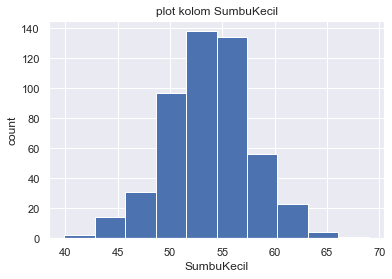

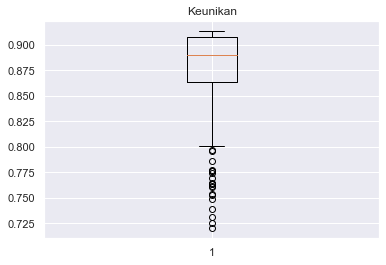

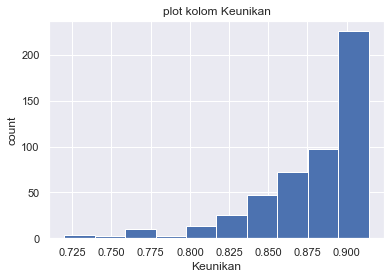

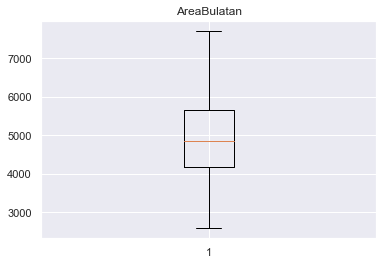

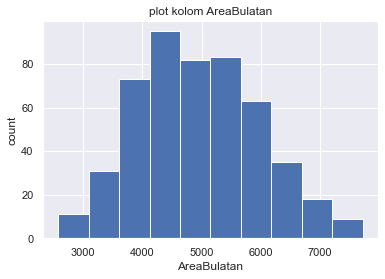

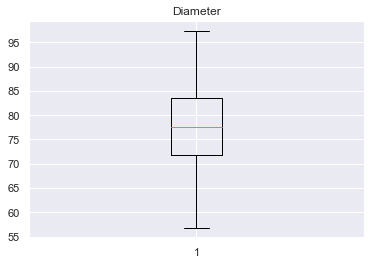

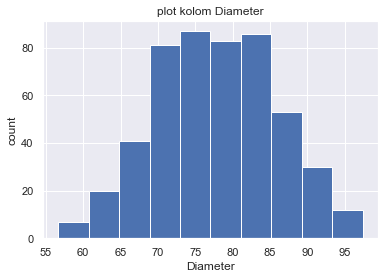

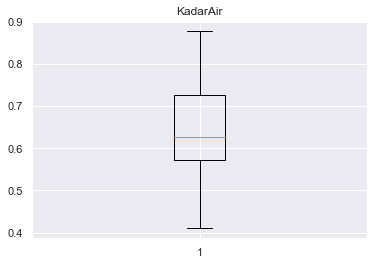

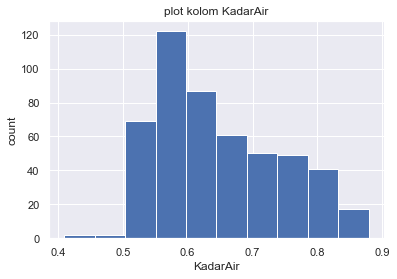

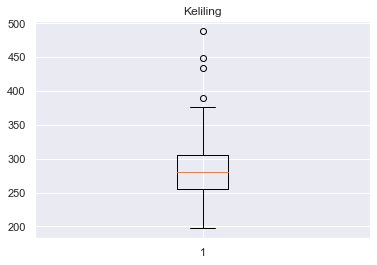

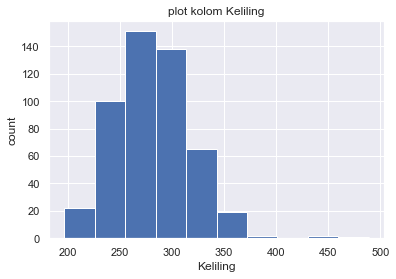

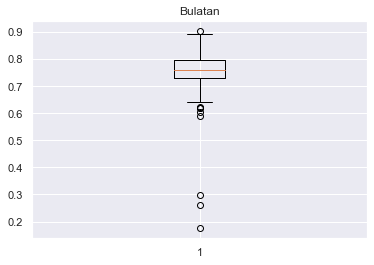

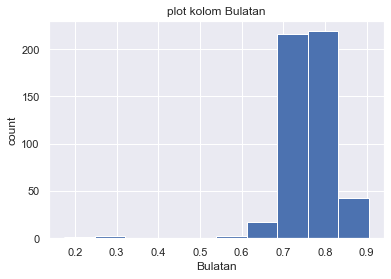

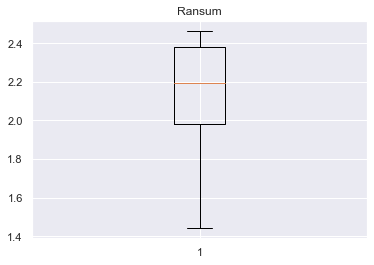

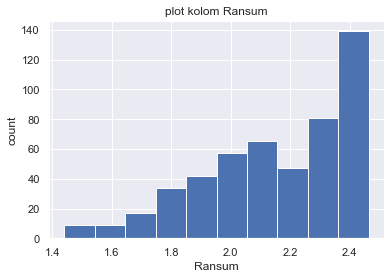

In [64]:
for att in attribute:
    if (att == "Kelas"):
        continue
        
    x_axis = data[att] # kolom yang dituju
    plt.boxplot(x_axis)
    plt.title(att)
    plt.show()
    
    plt.hist(x_axis)
    plt.title("plot kolom "+ att)
    plt.xlabel(att)
    plt.ylabel("count")
    plt.show()
    



# Soal 3

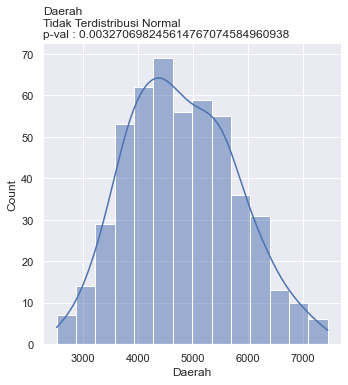

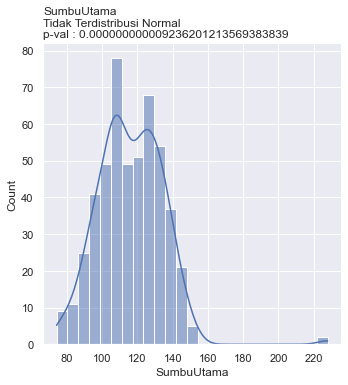

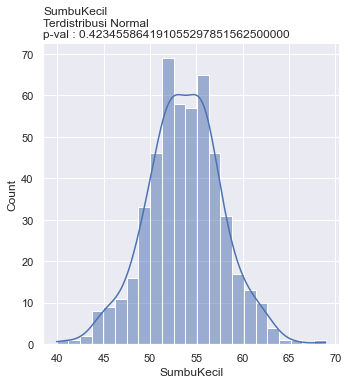

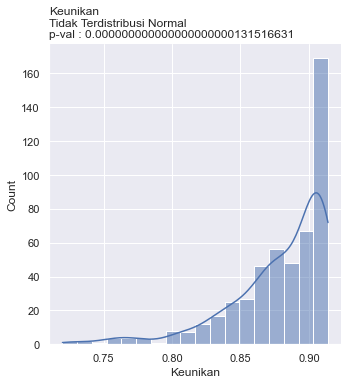

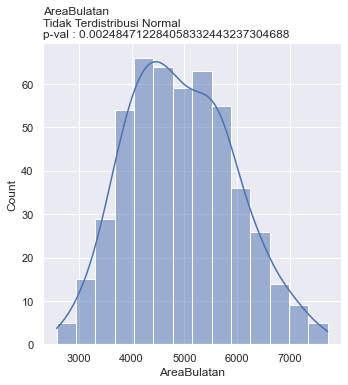

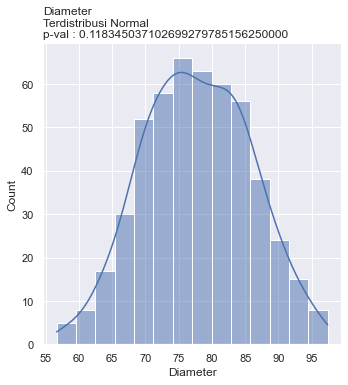

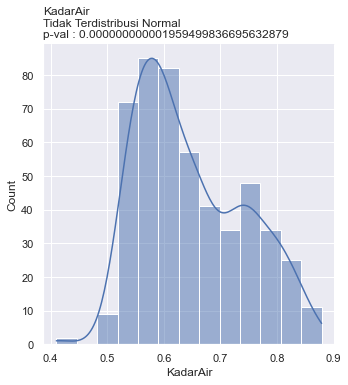

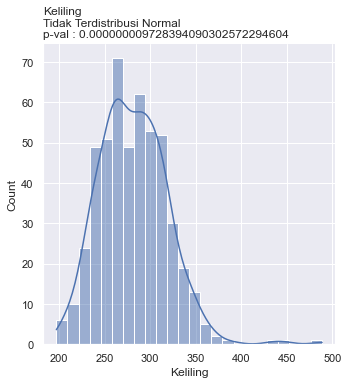

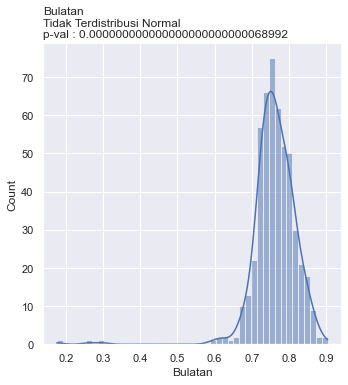

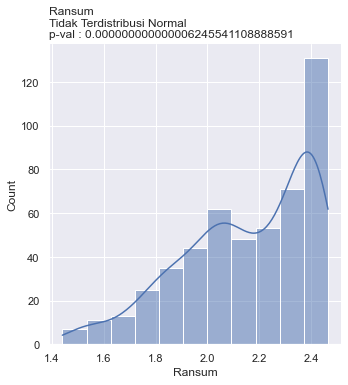

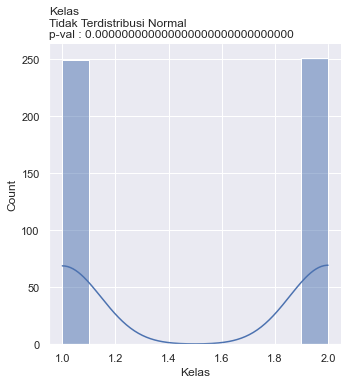

In [65]:
alpha = 0.05
for att in attribute:
    ax = sns.displot(data[att], kde=True)
    
    stat, p = shapiro(data[att])

    if (p > alpha):
        plt.title(att + "\n" + "Terdistribusi Normal\n" + "p-val : " + str("%.30f" % p), loc="left")
    else:
        plt.title(att + "\n" + "Tidak Terdistribusi Normal\n" + "p-val : " + str("%.30f" % p), loc="left")
    
    

# Soal 6

Korelasi antara Daerah dan Kelas
-0.6027466517416662


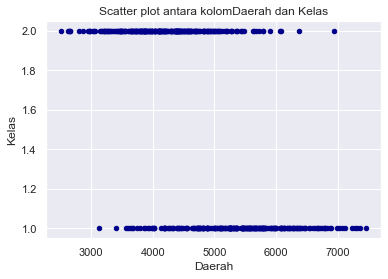


Korelasi antara SumbuUtama dan Kelas
-0.7130906104204593


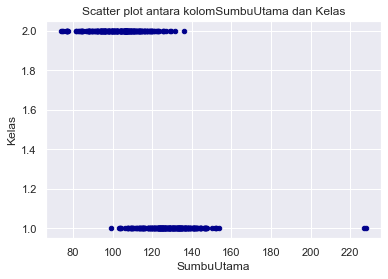


Korelasi antara SumbuKecil dan Kelas
-0.15297517335535027


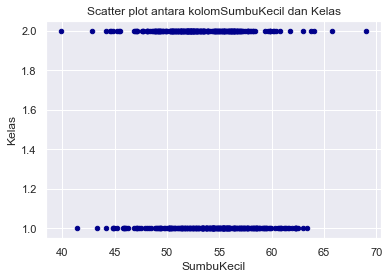


Korelasi antara Keunikan dan Kelas
-0.7304563686511922


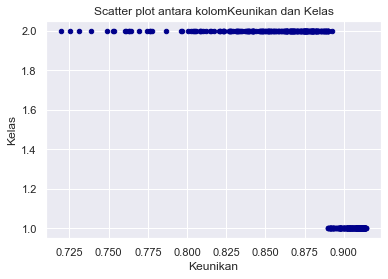


Korelasi antara AreaBulatan dan Kelas
-0.6073125434153751


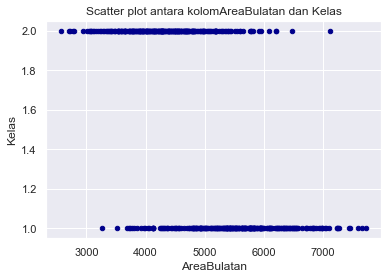


Korelasi antara Diameter dan Kelas
-0.6025356896618813


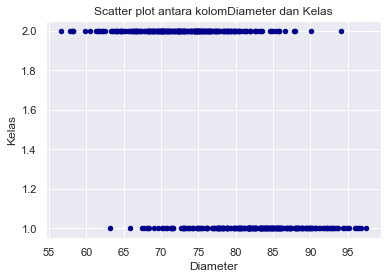


Korelasi antara KadarAir dan Kelas
0.13434422605727642


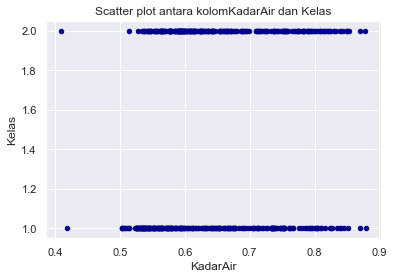


Korelasi antara Keliling dan Kelas
-0.6348607454756858


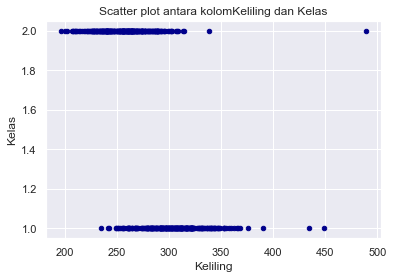


Korelasi antara Bulatan dan Kelas
0.5450045317240076


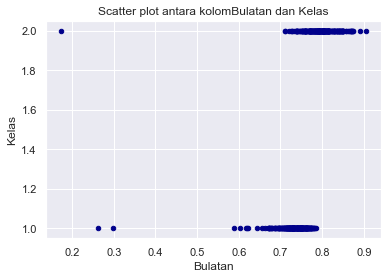


Korelasi antara Ransum dan Kelas
-0.8399038681287493


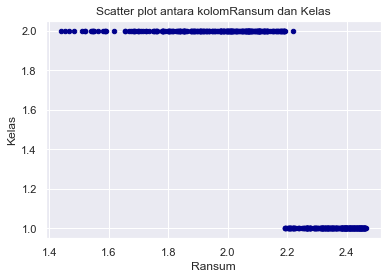

In [66]:
for att in attribute:
    if (att == "Kelas"):
        continue

    column_1 = data[att]
    column_2 = data["Kelas"]
    correlation = column_1.corr(column_2)
    print("Korelasi antara", att, "dan Kelas")
    print(correlation)
    
    corrTitle = "Scatter plot antara kolom"+ att+ " dan Kelas"
    data.plot.scatter(x=att, y='Kelas', title= corrTitle, color='DarkBlue')
    plt.show()
    print()

# Dummy (?)

NormaltestResult(statistic=10.858551334227265, pvalue=0.004386271773193838)
NormaltestResult(statistic=95.1201081203537, pvalue=2.2127429343271407e-21)
NormaltestResult(statistic=3.6983944719862505, pvalue=0.15736344132902458)
NormaltestResult(statistic=158.6174388660642, pvalue=3.602971140062354e-35)
NormaltestResult(statistic=10.738742339140217, pvalue=0.004657058890055043)
NormaltestResult(statistic=7.446345772505267, pvalue=0.024157198077542505)
NormaltestResult(statistic=48.75592345501653, pvalue=2.5869363404624707e-11)
NormaltestResult(statistic=67.46548246324501, pvalue=2.2390130437166234e-15)
NormaltestResult(statistic=442.11941526532235, pvalue=9.885276103161724e-97)
NormaltestResult(statistic=37.060319894694054, pvalue=8.963008041823752e-09)


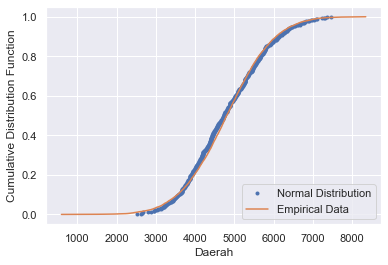

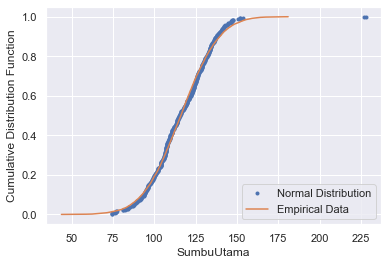

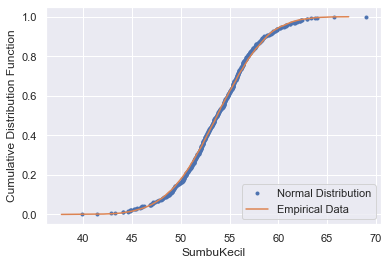

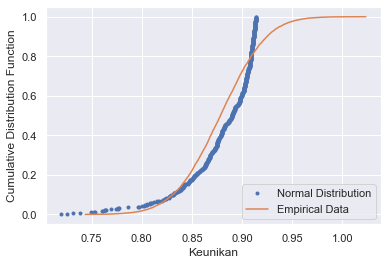

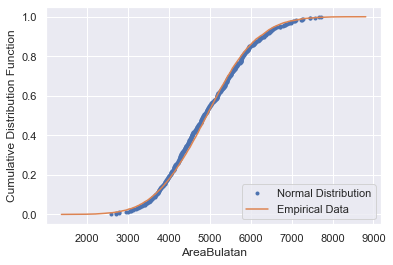

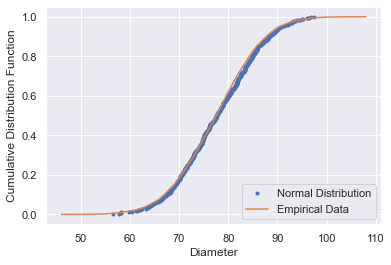

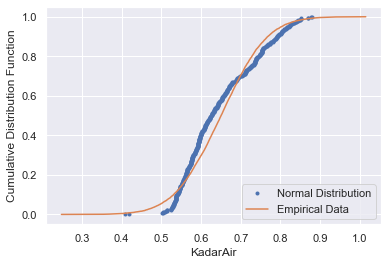

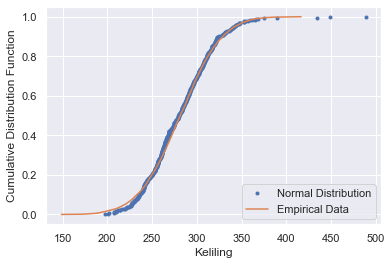

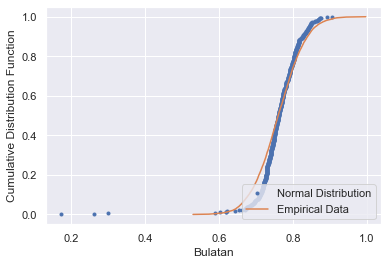

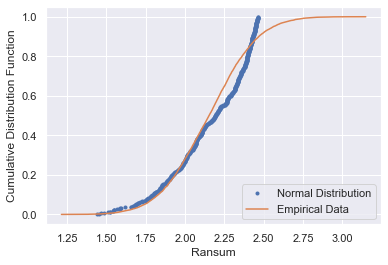

In [67]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y



for att in attribute:
    if (att == "Kelas"):
        continue
    x, y = ecdf(data[att])

    plt.figure()
    sns.set()
    plt.plot(x, y, marker=".", linestyle="none")
    plt.xlabel(att)
    plt.ylabel("Cumulative Distribution Function")
    
    samples = np.random.normal(np.mean(data[att]), np.std(data[att]), size=10000)
    x_theor, y_theor = ecdf(samples)
    plt.plot(x_theor, y_theor)
    plt.legend(('Normal Distribution', 'Empirical Data'), loc='lower right')
    
    print(stats.normaltest(data[att]))